<b> Predicting Survival in the Titanic Data Set </b>

In [1]:
# Loading Data and modules
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [2]:
url='https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv'
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Ticket'].unique 
df['Name'].unique  # as there is less information potraiting towards the target class, we remove these columns 
df.drop(columns=['Ticket','Name','Cabin'],inplace=True)

In [4]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [5]:
pd.set_option('display.max_rows', 1000)
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.00,1,0,7.2500,S
1,2,1,1,female,38.00,1,0,71.2833,C
2,3,1,3,female,26.00,0,0,7.9250,S
3,4,1,1,female,35.00,1,0,53.1000,S
4,5,0,3,male,35.00,0,0,8.0500,S
5,6,0,3,male,NaN,0,0,8.4583,Q
6,7,0,1,male,54.00,0,0,51.8625,S
7,8,0,3,male,2.00,3,1,21.0750,S
8,9,1,3,female,27.00,0,2,11.1333,S
9,10,1,2,female,14.00,1,0,30.0708,C


In [6]:
df['Sex'] = pd.get_dummies(df['Sex'],drop_first=True) # male : 1, Female:0
df['Embarked']=pd.get_dummies(df['Embarked'],drop_first=True)

In [7]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.00,1,0,7.2500,0
1,2,1,1,0,38.00,1,0,71.2833,0
2,3,1,3,0,26.00,0,0,7.9250,0
3,4,1,1,0,35.00,1,0,53.1000,0
4,5,0,3,1,35.00,0,0,8.0500,0
5,6,0,3,1,NaN,0,0,8.4583,1
6,7,0,1,1,54.00,0,0,51.8625,0
7,8,0,3,1,2.00,3,1,21.0750,0
8,9,1,3,0,27.00,0,2,11.1333,0
9,10,1,2,0,14.00,1,0,30.0708,0


In [9]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [13]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.00,1,0,7.2500,0
1,2,1,1,0,38.00,1,0,71.2833,0
2,3,1,3,0,26.00,0,0,7.9250,0
3,4,1,1,0,35.00,1,0,53.1000,0
4,5,0,3,1,35.00,0,0,8.0500,0
5,6,0,3,1,28.00,0,0,8.4583,1
6,7,0,1,1,54.00,0,0,51.8625,0
7,8,0,3,1,2.00,3,1,21.0750,0
8,9,1,3,0,27.00,0,2,11.1333,0
9,10,1,2,0,14.00,1,0,30.0708,0


<IPython.core.display.Javascript object>

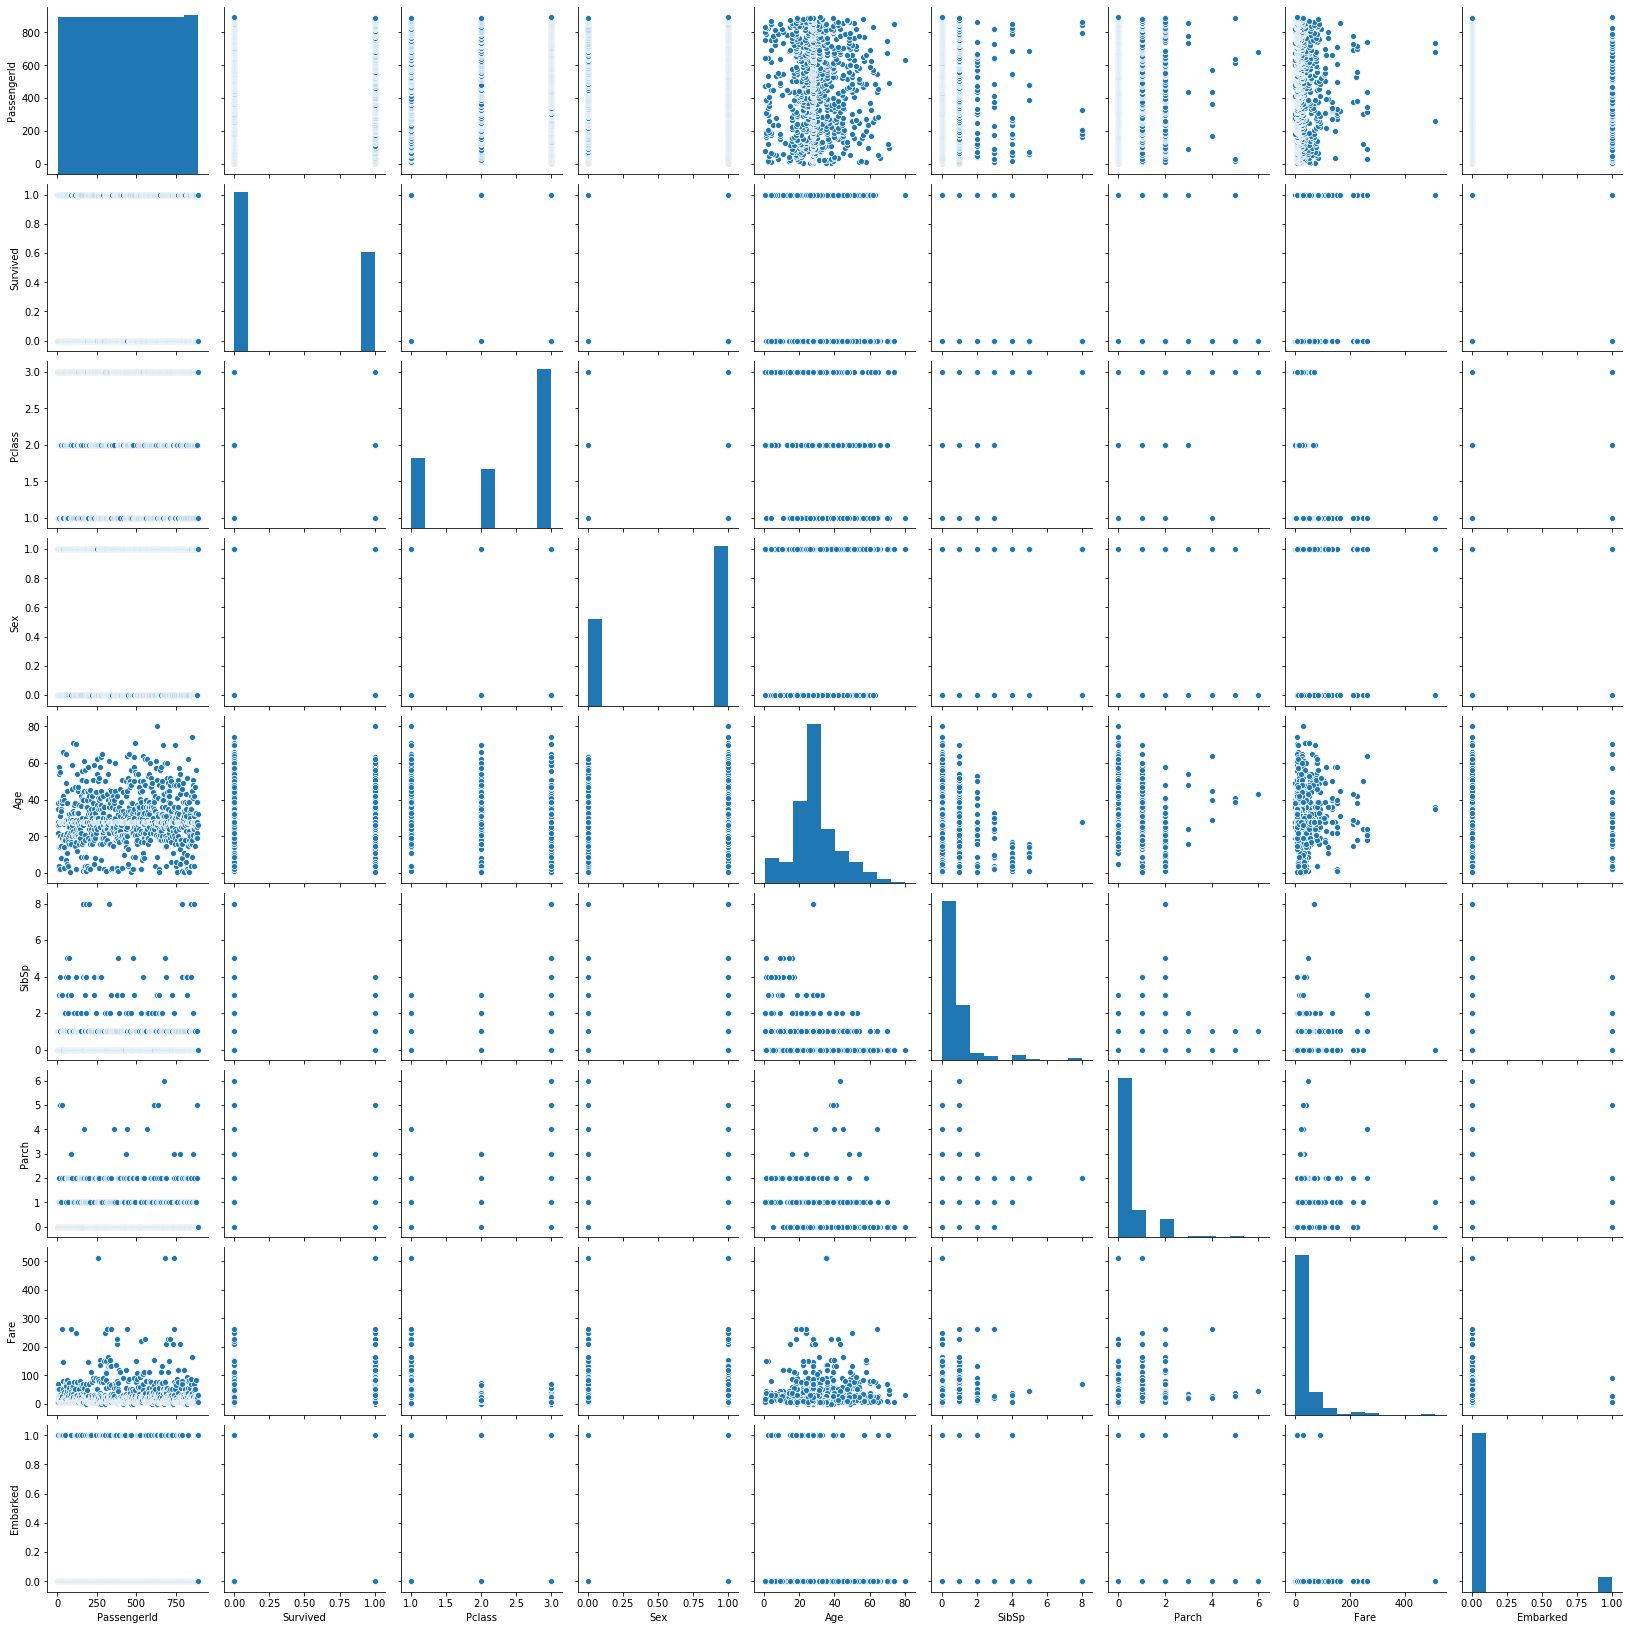

In [12]:
sns.pairplot(df)

In [14]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [15]:
# model creation
X = df.drop('Survived',axis=1)
y = df['Survived']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [21]:
model.predict(X_test)

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [22]:
model.score(X_test,y_test)

0.7206703910614525

In [24]:
X

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.00,1,0,7.2500,0
1,2,1,0,38.00,1,0,71.2833,0
2,3,3,0,26.00,0,0,7.9250,0
3,4,1,0,35.00,1,0,53.1000,0
4,5,3,1,35.00,0,0,8.0500,0
5,6,3,1,28.00,0,0,8.4583,1
6,7,1,1,54.00,0,0,51.8625,0
7,8,3,1,2.00,3,1,21.0750,0
8,9,3,0,27.00,0,2,11.1333,0
9,10,2,0,14.00,1,0,30.0708,0


In [26]:
y

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
30     0
31     1
32     1
33     0
34     0
35     0
36     1
37     0
38     0
39     1
40     0
41     0
42     0
43     1
44     1
45     0
46     0
47     1
48     0
49     0
50     0
51     0
52     1
53     1
54     0
55     1
56     1
57     0
58     1
59     0
60     0
61     1
62     0
63     0
64     0
65     1
66     1
67     0
68     1
69     0
70     0
71     0
72     0
73     0
74     1
75     0
76     0
77     0
78     1
79     1
80     0
81     1
82     1
83     0
84     1
85     1
86     0
87     0
88     1
89     0
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     1
98     1
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    1
108    0
109    1
110    0
1

In [25]:
model.predict([[1,3,1,22.00,1,0,7.2500,0]])

array([0], dtype=int64)

In [ ]:
## Hyper Parameter
DecisionTreeClassifier()

In [42]:
params_dist = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':[10,20,30,40,50],
    'min_samples_split':[2,3,4,6,8],
    'min_samples_leaf':[2,3,4,5],
    'max_features':['sqrt','log2','auto'],
    'random_state':[40,100,455]
}

In [43]:
from sklearn.model_selection import GridSearchCV # works well with less number of data 


In [44]:
clf = GridSearchCV( model,
    params_dist,
    scoring='accuracy',
    n_jobs=-1,
    cv=10)

In [45]:
clf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [46]:
clf.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'random_state': 100,
 'splitter': 'best'}

In [47]:
clf.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [48]:
classifier = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [49]:
classifier.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=100, splitter='best')

In [51]:
classifier.score(X_test,y_test) # accuracy increased 

0.7653631284916201

In [52]:
classifier.predict([[1,3,1,22.00,1,0,7.2500,0]])

array([0], dtype=int64)

In [54]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred=classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[86 19]
 [23 51]]
Accuracy Score 0.7653631284916201
Classification report:               precision    recall  f1-score   support

           0       0.79      0.82      0.80       105
           1       0.73      0.69      0.71        74

    accuracy                           0.77       179
   macro avg       0.76      0.75      0.76       179
weighted avg       0.76      0.77      0.76       179



In [66]:
## Logistic Regression
model1 = LogisticRegression( penalty='l2').fit(X_train,y_train)
model1.score(X_test,y_test) # gives you better predictions than decision tree 
# less overfitting case

Z:\Anaconda Framework\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.770949720670391

In [69]:
model1.score(X_train,y_train)

0.7949438202247191

In [67]:
model1.predict([[1,3,1,22.00,1,0,7.2500,0]])

array([0], dtype=int64)

In [71]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
y_pred=model1.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[88 17]
 [24 50]]
Accuracy Score 0.770949720670391
Classification report:               precision    recall  f1-score   support

           0       0.79      0.84      0.81       105
           1       0.75      0.68      0.71        74

    accuracy                           0.77       179
   macro avg       0.77      0.76      0.76       179
weighted avg       0.77      0.77      0.77       179

